In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_linnerud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

liner = load_linnerud()
df_data = pd.DataFrame(liner.data, columns=liner.feature_names)
df_target = pd.DataFrame(liner.target, columns=liner.target_names)
df = pd.concat((df_data, df_target), axis=1)
df.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


In [9]:
X = df_data
y = df['Waist']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation = 'elu', input_shape = (3,)))
model.add(Dense(64, activation = 'elu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mae', metrics = ['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [12]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 1s 511ms/step - loss: 47.9487 - mae: 47.9487 - val_loss: 21.7919 - val_mae: 21.7919
Epoch 2/100
1/1 [==============================] - 0s 37ms/step - loss: 24.8659 - mae: 24.8659 - val_loss: 8.6949 - val_mae: 8.6949
Epoch 3/100
1/1 [==============================] - 0s 35ms/step - loss: 14.3120 - mae: 14.3120 - val_loss: 9.2507 - val_mae: 9.2507
Epoch 4/100
1/1 [==============================] - 0s 36ms/step - loss: 13.8528 - mae: 13.8528 - val_loss: 9.7271 - val_mae: 9.7271
Epoch 5/100
1/1 [==============================] - 0s 42ms/step - loss: 13.4878 - mae: 13.4878 - val_loss: 10.1550 - val_mae: 10.1550
Epoch 6/100
1/1 [==============================] - 0s 41ms/step - loss: 13.1448 - mae: 13.1448 - val_loss: 10.5821 - val_mae: 10.5821
Epoch 7/100
1/1 [==============================] - 0s 38ms/step - loss: 12.7232 - mae: 12.7232 - val_loss: 11.1143 - val_mae: 11.1143
Epoch 8/100
1/1 [==============================] - 0s 37ms/step - l

1/1 [==============================] - 0s 37ms/step - loss: 7.4892 - mae: 7.4892 - val_loss: 11.7744 - val_mae: 11.7744
Epoch 63/100
1/1 [==============================] - 0s 40ms/step - loss: 8.8162 - mae: 8.8162 - val_loss: 9.8777 - val_mae: 9.8777
Epoch 64/100
1/1 [==============================] - 0s 39ms/step - loss: 7.5466 - mae: 7.5466 - val_loss: 11.5470 - val_mae: 11.5470
Epoch 65/100
1/1 [==============================] - 0s 36ms/step - loss: 8.5879 - mae: 8.5879 - val_loss: 9.5957 - val_mae: 9.5957
Epoch 66/100
1/1 [==============================] - 0s 35ms/step - loss: 7.6224 - mae: 7.6224 - val_loss: 12.3266 - val_mae: 12.3266
Epoch 67/100
1/1 [==============================] - 0s 43ms/step - loss: 9.5526 - mae: 9.5526 - val_loss: 9.5943 - val_mae: 9.5943
Epoch 68/100
1/1 [==============================] - 0s 47ms/step - loss: 7.1824 - mae: 7.1824 - val_loss: 10.6164 - val_mae: 10.6164
Epoch 69/100
1/1 [==============================] - 0s 39ms/step - loss: 7.1211 - mae: 7

In [13]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 26ms/step - loss: 9.7048 - mae: 9.7048


[9.704774856567383, 9.704774856567383]

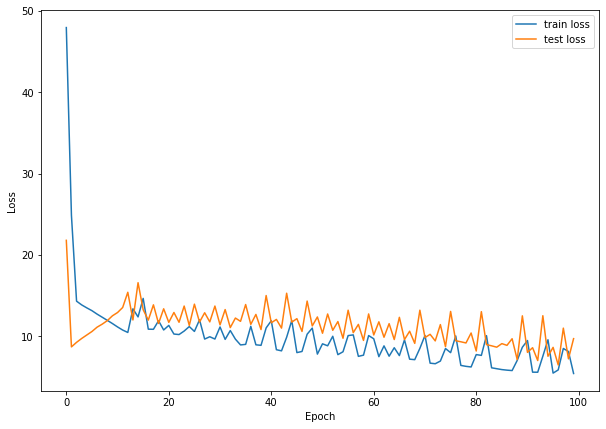

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

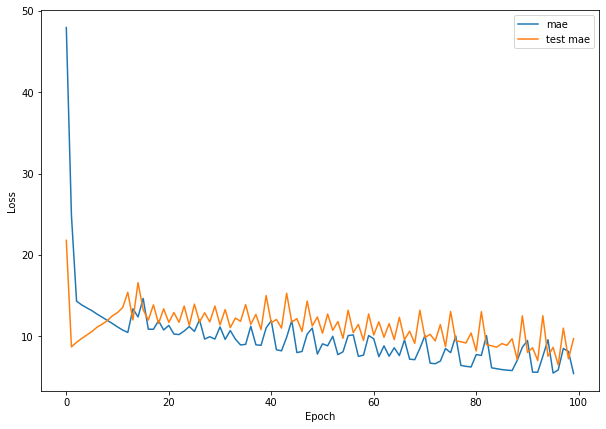

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mae'], label='mae')
plt.plot(range(N_EPOCHS), history.history['val_mae'], label='test mae')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()